In [1]:
import os
import numpy as np
from PIL import Image
import shutil
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split

In [3]:
cat_folder = 'train/cats'
dog_folder = 'train/dogs'
output_folder = 'prepared_dataset'
os.makedirs(output_folder, exist_ok=True)


In [4]:
def load_images_from_folder(folder,label):
    images=[]
    labels=[]

    for file in os.listdir(folder):
        img_path=os.path.join(folder,file)
        if os.path.isfile(img_path):
            img = Image.open(img_path).convert('RGB')
            img = img.resize((278, 278))  
            img_array = np.array(img)
            images.append(img_array)
            labels.append(label)

            
    return images,labels


cat_images, cat_labels = load_images_from_folder(cat_folder, 0)  
dog_images, dog_labels = load_images_from_folder(dog_folder, 1)

images = np.array(cat_images + dog_images)
labels = np.array(cat_labels + dog_labels)

In [5]:
print(f"size of the Cat Image : {len(cat_images)}")
print(f"size of the Dog Image : {len(dog_images)}")

size of the Cat Image : 279
size of the Dog Image : 278


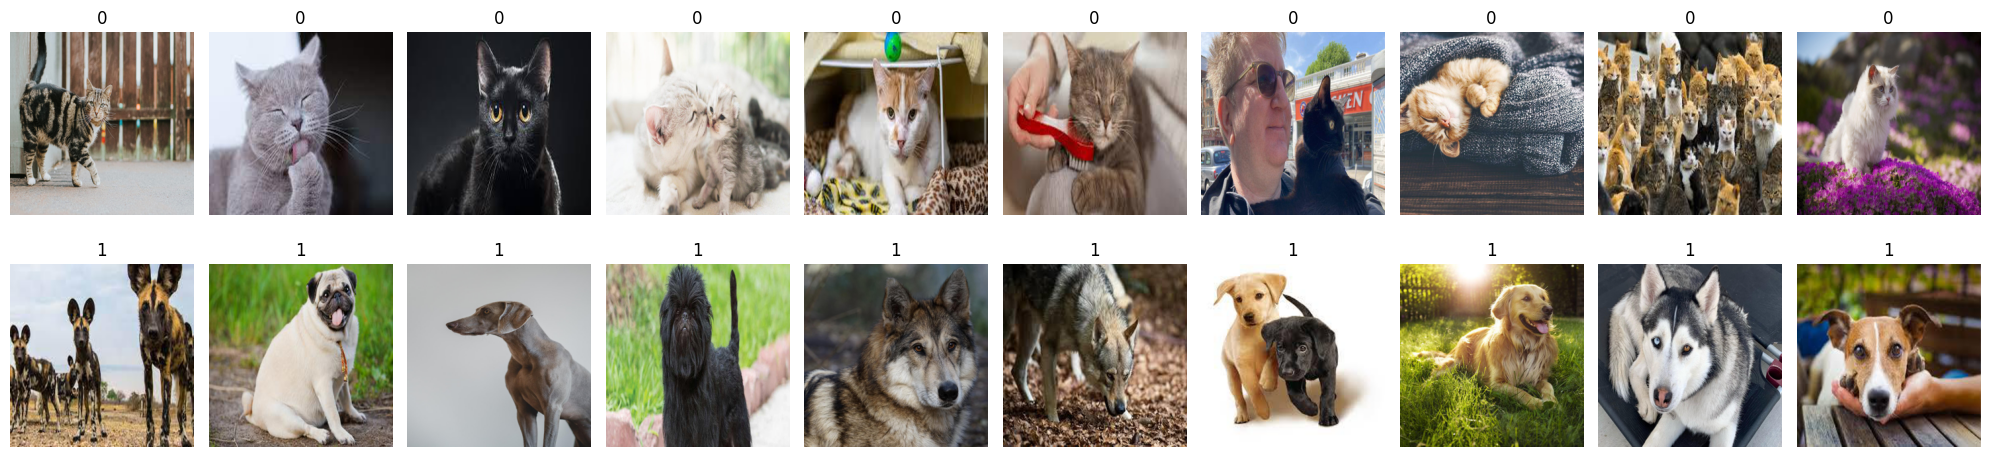

In [6]:
fig, ax = plt.subplots(2, 10, figsize=(20, 5))  # Adjust figsize for better clarity

for i in range(10):
    ax[0, i].imshow(images[i])
    ax[0, i].set_title(labels[i])
    ax[0, i].axis('off')  # Turn off the axis

    ax[1, i].imshow(images[300 + i])
    ax[1, i].set_title(labels[300 + i])
    ax[1, i].axis('off')  # Turn off the axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [7]:
indices=np.arange(len(images))
np.random.shuffle(indices)

images = images[indices]
labels = labels[indices]

train_image,image_,train_label,label_= train_test_split(images,labels,test_size=0.2,random_state=1)
cv_image,test_image,cv_label,test_label=train_test_split(image_,label_,test_size=0.5,random_state=1)
del image_,label_

print(f"size of the train image and label : {train_image.shape},{train_label.shape}")
print(f"size of cv image and label : {cv_image.shape},{cv_label.shape}")
print(f"size of test image and label : {test_image.shape},{test_label.shape}")

size of the train image and label : (445, 278, 278, 3),(445,)
size of cv image and label : (56, 278, 278, 3),(56,)
size of test image and label : (56, 278, 278, 3),(56,)


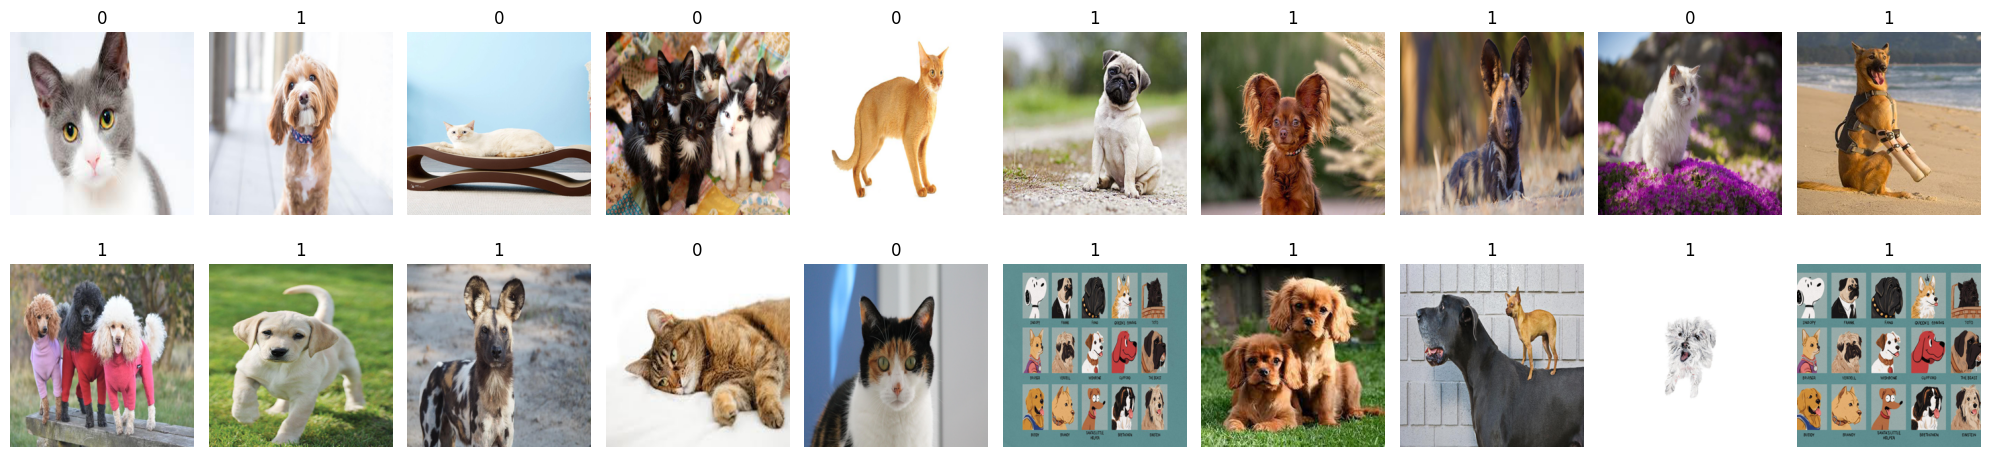

In [12]:
fig, ax = plt.subplots(2, 10, figsize=(20, 5))  # Adjust figsize for better clarity

for i in range(10):
    ax[0, i].imshow(train_image[i])
    ax[0, i].set_title(train_label[i])
    ax[0, i].axis('off')  # Turn off the axis

    ax[1, i].imshow(test_image[i])
    ax[1, i].set_title(test_label[i])
    ax[1, i].axis('off')  # Turn off the axis

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [13]:
np.save(os.path.join(output_folder, 'train_images.npy'), train_image)
np.save(os.path.join(output_folder, 'train_labels.npy'), train_label)
np.save(os.path.join(output_folder, 'test_images.npy'), test_image)
np.save(os.path.join(output_folder, 'test_labels.npy'), test_label)
np.save(os.path.join(output_folder, 'cross_validation_images.npy'), cv_image)
np.save(os.path.join(output_folder, 'cross_validation_labels.npy'), cv_label)